In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
plt.style.use('ggplot')
import plotly
plotly.offline.init_notebook_mode(connected = True) #so that it plots locally
from datetime import date
from sklearn.linear_model import LinearRegression, HuberRegressor, Ridge, Lasso, ElasticNet
from sklearn import linear_model
import statsmodels.api as sm
from statsmodels.api import OLS
import plotly
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns

In [2]:
ames = pd.read_csv('Data/Clean_Ames_Housing_Price.csv', index_col=0)
ames.isnull().sum()[0:90]
ames['LotFrontage'].value_counts()
# Apply mask/filter to examine only null values.
lot_nulls = ames[ames['LotFrontage'].isna()] #lots with no linear feet of street connected to property
lot_nulls
ames['LotFrontage'].isna().sum()
# Group lots by configuration
grouped_lots = ames.groupby(['LotConfig']).agg({
   'LotFrontage' : 'mean', 
})
grouped_lots

#replace np.nan with average for lot_config of that type
ames.loc[(ames['LotFrontage'].isna()) & (ames['LotConfig'] == 'Corner'), 'LotFrontage'] = 81.468023
ames.loc[(ames['LotFrontage'].isna()) & (ames['LotConfig'] == 'CulDSac'), 'LotFrontage'] = 56.456790        
ames.loc[(ames['LotFrontage'].isna()) & (ames['LotConfig'] == 'FR2'), 'LotFrontage'] = 59.413793        
ames.loc[(ames['LotFrontage'].isna()) & (ames['LotConfig'] == 'FR3'), 'LotFrontage'] = 79.3       
ames.loc[(ames['LotFrontage'].isna()) & (ames['LotConfig'] == 'Inside'), 'LotFrontage'] = 66.633846

print(ames['LotFrontage'].isna().sum())

ames['LotFrontage'].sort_values().tail()

ames['Alley'] = ames['Alley'].replace(np.nan, 'NA')

ames['Alley'].value_counts()


ames['BsmtQual'] = ames['BsmtQual'].replace(np.nan, 'NA')

ames['BsmtCond'] = ames['BsmtCond'].replace(np.nan, 'NA')

ames['BsmtExposure'] = ames['BsmtExposure'].replace(np.nan, 'NA')

ames['BsmtFinType1'] = ames['BsmtFinType1'].replace(np.nan, 'NA')

ames['BsmtFinSF1'] = ames['BsmtFinSF1'].replace(np.nan, 0)

ames['BsmtFinType2'] = ames['BsmtFinType2'].replace(np.nan, 'NA')

ames['BsmtFinSF2'] = ames['BsmtFinSF2'].replace(np.nan, 0)

ames['BsmtUnfSF'] = ames['BsmtUnfSF'].replace(np.nan, 0)

ames['TotalBsmtSF'] = ames['TotalBsmtSF'].replace(np.nan, 0)

ames['BsmtFullBath'] = ames['BsmtFullBath'].replace(np.nan, 0)

ames['BsmtHalfBath'] = ames['BsmtHalfBath'].replace(np.nan, 0)



#ames.loc[(ames['Electrical'].isna())] = 'SBrkr'

ames['Electrical'] = ames['Electrical'].replace(np.nan, 'SBrkr')

ames['FireplaceQu'] = ames['FireplaceQu'].replace(np.nan, 'NA')

ames['GarageType'] = ames['GarageType'].replace(np.nan, 'NA')

ames['GarageYrBlt'] = ames['GarageYrBlt'].replace(np.nan, 0)

ames['GarageFinish'] = ames['GarageFinish'].replace(np.nan, 'NA')

ames['GarageCars'] = ames['GarageCars'].replace(np.nan, 0)

ames['GarageArea'] = ames['GarageArea'].replace(np.nan, 0)

ames['GarageQual'] = ames['GarageQual'].replace(np.nan, 'NA')

ames['GarageCond'] = ames['GarageCond'].replace(np.nan, 'NA')

ames['PoolQC'] = ames['PoolQC'].replace(np.nan, 'NA')

ames['Fence'] = ames['Fence'].replace(np.nan, 'NA')

ames['MiscFeature'] = ames['MiscFeature'].replace(np.nan, 'NA')




ames.loc[ames['GarageQual'].isna()]

ames['Electrical'].value_counts()



# Inspect the property records to see front façades
# https://beacon.schneidercorp.com/Application.aspx?AppID=165&LayerID=2145&PageTypeID=2&PageID=1104
ames['MasVnrType'].loc[176] = "Stone"
ames['MasVnrType'].loc[359] = "None"
ames['MasVnrType'].loc[754] = "None"
ames['MasVnrType'].loc[788] = "None"
ames['MasVnrType'].loc[872] = "None"
ames['MasVnrType'].loc[892] = "None"
ames['MasVnrType'].loc[952] = "Stone"
ames['MasVnrType'].loc[1042] = "None"
ames['MasVnrType'].loc[1162] = "None"
ames['MasVnrType'].loc[1356] = "None"
ames['MasVnrType'].loc[1554] = "None"
ames['MasVnrType'].loc[2034] = "None"
ames['MasVnrType'].loc[2478] = "None"
ames['MasVnrType'].loc[2537] = "None"

# For the properties with partial height stone façade, assume 4 ft height,
# and for full height, assume 8 ft height
# Assume façade length is the 1.618 length of a house built in the footprint of a golden ration
# sqrt(1.618 * 1stFlrSF)
ames['MasVnrArea'].loc[176] = 4 * (1.618 * ames.loc[176]['1stFlrSF']) ** 0.5
ames['MasVnrArea'].loc[359] = 0
ames['MasVnrArea'].loc[754] = 0
ames['MasVnrArea'].loc[788] = 0
ames['MasVnrArea'].loc[872] = 0
ames['MasVnrArea'].loc[892] = 0
ames['MasVnrArea'].loc[952] = 8 * (1.618 * ames.loc[176]['1stFlrSF']) ** 0.5
ames['MasVnrArea'].loc[1042] = 0
ames['MasVnrArea'].loc[1162] = 0
ames['MasVnrArea'].loc[1356] = 0
ames['MasVnrArea'].loc[1554] = 0
ames['MasVnrArea'].loc[2034] = 0
ames['MasVnrArea'].loc[2478] = 0
ames['MasVnrArea'].loc[2537] = 0






0


/Users/layalhammad/opt/anaconda3/lib/python3.9/site-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [3]:
#Analysis of Ames_HousePrice.csv starts here
data_House_price=ames
data_House_price

,PID,GrLivArea,SalePrice,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
1,909176150,856,126000,30,RL,81.468023,7890,Pave,NA,Reg,...,166,0,NA,NA,NA,0,3,2010,WD,Normal
2,905476230,1049,139500,120,RL,42.000000,4235,Pave,NA,Reg,...,0,0,NA,NA,NA,0,2,2009,WD,Normal
3,911128020,1001,124900,30,C (all),60.000000,6060,Pave,NA,Reg,...,0,0,NA,NA,NA,0,11,2007,WD,Normal
4,535377150,1039,114000,70,RL,80.000000,8146,Pave,NA,Reg,...,111,0,NA,NA,NA,0,5,2009,WD,Normal
5,534177230,1665,227000,60,RL,70.000000,8400,Pave,NA,Reg,...,0,0,NA,NA,NA,0,11,2009,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2576,903205040,952,121000,30,RL,66.633846,8854,Pave,NA,Reg,...,40,0,NA,NA,NA,0,5,2009,WD,Normal
2577,905402060,1733,139600,20,RL,56.456790,13680,Pave,NA,IR1,...,0,0,NA,NA,NA,0,6,2009,WD,Normal
2578,909275030,2002,145000,90,RH,82.000000,6270,Pave,NA,Reg,...,0,0,NA,NA,NA,0,8,2007,WD,Normal
2579,907192040,1842,217500,60,RL,66.633846,8826,Pave,NA,Reg,...,0,0,NA,NA,NA,0,7,2007,WD,Normal


In [4]:
pid=data_House_price.PID.unique()
data_House_price['PID'].value_counts()
data_House_price.shape

(2580, 81)

In [5]:
duplicate_obersvation = data_House_price[data_House_price.duplicated()]
duplicate_obersvation

,PID,GrLivArea,SalePrice,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
1818,909276070,1717,194000,50,RL,80.0,12400,Pave,NA,Reg,...,113,0,NA,NA,NA,0,2,2006,WD,Normal


In [6]:
#removing duplicates
data_House_price=data_House_price.drop_duplicates(subset=None, keep='first', inplace=False)
duplicate_obersvation = data_House_price[data_House_price.duplicated()]
duplicate_obersvation

,PID,GrLivArea,SalePrice,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition


In [7]:
data_House_price.head()

,PID,GrLivArea,SalePrice,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
1,909176150,856,126000,30,RL,81.468023,7890,Pave,NA,Reg,...,166,0,NA,NA,NA,0,3,2010,WD,Normal
2,905476230,1049,139500,120,RL,42.000000,4235,Pave,NA,Reg,...,0,0,NA,NA,NA,0,2,2009,WD,Normal
3,911128020,1001,124900,30,C (all),60.000000,6060,Pave,NA,Reg,...,0,0,NA,NA,NA,0,11,2007,WD,Normal
4,535377150,1039,114000,70,RL,80.000000,8146,Pave,NA,Reg,...,111,0,NA,NA,NA,0,5,2009,WD,Normal
5,534177230,1665,227000,60,RL,70.000000,8400,Pave,NA,Reg,...,0,0,NA,NA,NA,0,11,2009,WD,Normal


array([[<AxesSubplot:title={'center':'PID'}>,
        <AxesSubplot:title={'center':'GrLivArea'}>,
        <AxesSubplot:title={'center':'SalePrice'}>,
        <AxesSubplot:title={'center':'MSSubClass'}>,
        <AxesSubplot:title={'center':'LotFrontage'}>,
        <AxesSubplot:title={'center':'LotArea'}>],
       [<AxesSubplot:title={'center':'OverallQual'}>,
        <AxesSubplot:title={'center':'OverallCond'}>,
        <AxesSubplot:title={'center':'YearBuilt'}>,
        <AxesSubplot:title={'center':'YearRemodAdd'}>,
        <AxesSubplot:title={'center':'MasVnrArea'}>,
        <AxesSubplot:title={'center':'BsmtFinSF1'}>],
       [<AxesSubplot:title={'center':'BsmtFinSF2'}>,
        <AxesSubplot:title={'center':'BsmtUnfSF'}>,
        <AxesSubplot:title={'center':'TotalBsmtSF'}>,
        <AxesSubplot:title={'center':'1stFlrSF'}>,
        <AxesSubplot:title={'center':'2ndFlrSF'}>,
        <AxesSubplot:title={'center':'LowQualFinSF'}>],
       [<AxesSubplot:title={'center':'BsmtFullBath'}>

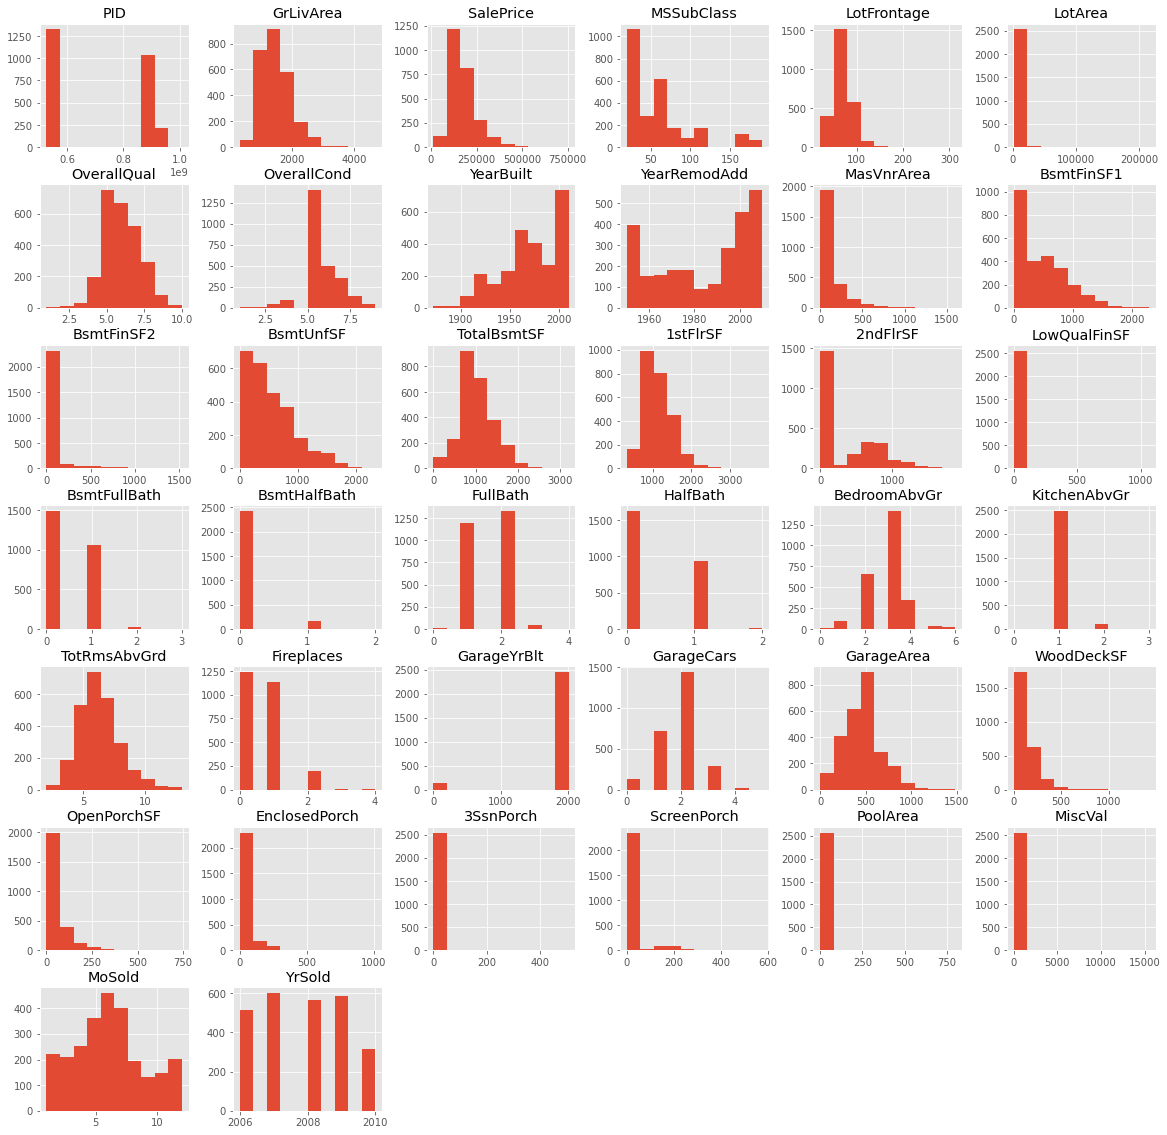

In [8]:
#Histohram of all numeric variables
data_House_price.hist(figsize=(20,20))

In [9]:
data_House_price.columns

Index(['PID', 'GrLivArea', 'SalePrice', 'MSSubClass', 'MSZoning',
       'LotFrontage', 'LotArea', 'Street', 'Alley', 'LotShape', 'LandContour',
       'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1',
       'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond',
       'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF',
       '2ndFlrSF', 'LowQualFinSF', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond

In [10]:
#numerical variables
numerical_variables=data_House_price.select_dtypes(exclude=["bool_","object_"])
#categorical variables
categorical_variables=data_House_price.select_dtypes(exclude=["number"])
categorical_variables

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
1,RL,Pave,NA,Reg,Lvl,AllPub,Corner,Gtl,SWISU,Norm,...,Detchd,Unf,TA,TA,Y,NA,NA,NA,WD,Normal
2,RL,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Norm,...,Attchd,Fin,TA,TA,Y,NA,NA,NA,WD,Normal
3,C (all),Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,IDOTRR,Norm,...,Detchd,Unf,TA,Po,N,NA,NA,NA,WD,Normal
4,RL,Pave,NA,Reg,Lvl,AllPub,Corner,Gtl,OldTown,Norm,...,Detchd,Unf,TA,TA,N,NA,NA,NA,WD,Normal
5,RL,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,...,Attchd,Fin,TA,TA,Y,NA,NA,NA,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2576,RL,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,BrkSide,Norm,...,Detchd,Unf,Fa,Po,P,NA,NA,NA,WD,Normal
2577,RL,Pave,NA,IR1,Lvl,AllPub,CulDSac,Gtl,Edwards,Norm,...,Attchd,Unf,TA,TA,Y,NA,NA,NA,WD,Normal
2578,RH,Pave,NA,Reg,HLS,AllPub,Inside,Gtl,Crawfor,Norm,...,2Types,Unf,TA,TA,Y,NA,NA,NA,WD,Normal
2579,RL,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,Fin,TA,TA,Y,NA,NA,NA,WD,Normal


In [11]:
#categorical variables distribution and analysis
categorical_columns=categorical_variables.columns

for feature in categorical_columns:
    print(data_House_price[feature].value_counts())
    print('')  


RL         2007
RM          418
FV          113
RH           21
C (all)      17
I (all)       2
A (agr)       1
Name: MSZoning, dtype: int64

Pave    2569
Grvl      10
Name: Street, dtype: int64

NA      2411
Grvl     105
Pave      63
Name: Alley, dtype: int64

Reg    1640
IR1     855
IR2      71
IR3      13
Name: LotShape, dtype: int64

Lvl    2337
Bnk      95
HLS      95
Low      52
Name: LandContour, dtype: int64

AllPub    2577
NoSewr       2
Name: Utilities, dtype: int64

Inside     1885
Corner      439
CulDSac     164
FR2          78
FR3          13
Name: LotConfig, dtype: int64

Gtl    2458
Mod     108
Sev      13
Name: LandSlope, dtype: int64

NAmes      410
CollgCr    236
OldTown    213
Edwards    165
Somerst    143
Gilbert    143
Sawyer     139
NWAmes     123
NridgHt    121
SawyerW    113
Mitchel    104
BrkSide    103
Crawfor     92
IDOTRR      76
NoRidge     67
Timber      54
StoneBr     43
SWISU       42
ClearCr     40
MeadowV     34
BrDale      29
Blmngtn     23
Veenker   

In [12]:
#Null count in categorical
for feature in categorical_columns:
    print(feature)
    print(np.sum(data_House_price[feature].isnull()))
    print('')

MSZoning
0

Street
0

Alley
0

LotShape
0

LandContour
0

Utilities
0

LotConfig
0

LandSlope
0

Neighborhood
0

Condition1
0

Condition2
0

BldgType
0

HouseStyle
0

RoofStyle
0

RoofMatl
0

Exterior1st
0

Exterior2nd
0

MasVnrType
0

ExterQual
0

ExterCond
0

Foundation
0

BsmtQual
0

BsmtCond
0

BsmtExposure
0

BsmtFinType1
0

BsmtFinType2
0

Heating
0

HeatingQC
0

CentralAir
0

Electrical
0

KitchenQual
0

Functional
0

FireplaceQu
0

GarageType
0

GarageFinish
0

GarageQual
0

GarageCond
0

PavedDrive
0

PoolQC
0

Fence
0

MiscFeature
0

SaleType
0

SaleCondition
0



In [13]:
#Null count in numerical variables
for nfeature in numerical_variables:
    print(nfeature)
    print(np.sum(data_House_price[nfeature].isnull()))
    print('')

PID
0

GrLivArea
0

SalePrice
0

MSSubClass
0

LotFrontage
0

LotArea
0

OverallQual
0

OverallCond
0

YearBuilt
0

YearRemodAdd
0

MasVnrArea
0

BsmtFinSF1
0

BsmtFinSF2
0

BsmtUnfSF
0

TotalBsmtSF
0

1stFlrSF
0

2ndFlrSF
0

LowQualFinSF
0

BsmtFullBath
0

BsmtHalfBath
0

FullBath
0

HalfBath
0

BedroomAbvGr
0

KitchenAbvGr
0

TotRmsAbvGrd
0

Fireplaces
0

GarageYrBlt
0

GarageCars
0

GarageArea
0

WoodDeckSF
0

OpenPorchSF
0

EnclosedPorch
0

3SsnPorch
0

ScreenPorch
0

PoolArea
0

MiscVal
0

MoSold
0

YrSold
0



In [14]:
#correlation between numerical variables
corr_numerical_matrix = numerical_variables.corr(method ='pearson')
corr_numerical_matrix

,PID,GrLivArea,SalePrice,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
PID,1.000000,-0.102485,-0.226410,-0.005257,-0.087511,0.041946,-0.246941,0.119904,-0.337693,-0.128180,...,-0.199589,-0.041592,-0.054581,0.168961,-0.021163,-0.032351,-0.006506,-0.022490,-0.059359,0.002799
GrLivArea,-0.102485,1.000000,0.719980,0.070821,0.309074,0.260286,0.560125,-0.105739,0.228643,0.306512,...,0.476107,0.247890,0.321950,0.000263,0.008733,0.097582,0.057947,-0.003922,0.038694,-0.008007
SalePrice,-0.226410,0.719980,1.000000,-0.084574,0.332631,0.274427,0.790661,-0.101123,0.544569,0.514720,...,0.634706,0.333332,0.306629,-0.123209,0.031269,0.121392,0.030849,-0.018869,0.012725,-0.001261
MSSubClass,-0.005257,0.070821,-0.084574,1.000000,-0.402105,-0.198025,0.056422,-0.075520,0.053792,0.056671,...,-0.091358,-0.017710,-0.007698,-0.028561,-0.041806,-0.055012,-0.013435,-0.027233,0.007147,-0.025459
LotFrontage,-0.087511,0.309074,0.332631,-0.402105,1.000000,0.330942,0.163019,-0.046359,0.086987,0.055080,...,0.309299,0.102743,0.133337,0.005202,0.022842,0.077640,0.085269,0.003793,0.004878,-0.006202
LotArea,0.041946,0.260286,0.274427,-0.198025,0.330942,1.000000,0.080701,-0.032731,0.012510,0.010478,...,0.199195,0.155787,0.085048,0.017734,0.017732,0.053665,0.052643,0.040231,0.010377,-0.017174
OverallQual,-0.246941,0.560125,0.790661,0.056422,0.163019,0.080701,1.000000,-0.095839,0.574278,0.546157,...,0.538249,0.250016,0.286714,-0.134417,0.014199,0.049816,-0.002500,-0.025857,0.016328,0.005255
OverallCond,0.119904,-0.105739,-0.101123,-0.075520,-0.046359,-0.032731,-0.095839,1.000000,-0.397229,0.065353,...,-0.168336,0.014261,-0.067353,0.085962,0.041918,0.050222,-0.021186,0.046029,0.012422,0.017824
YearBuilt,-0.337693,0.228643,0.544569,0.053792,0.086987,0.012510,0.574278,-0.397229,1.000000,0.572041,...,0.463873,0.227066,0.179431,-0.361158,0.009476,-0.042013,0.004904,-0.027398,-0.008154,0.014804
YearRemodAdd,-0.128180,0.306512,0.514720,0.056671,0.055080,0.010478,0.546157,0.065353,0.572041,1.000000,...,0.347432,0.217936,0.226371,-0.205549,0.028495,-0.042087,-0.018738,-0.016740,0.001485,0.063208


In [15]:
import plotly.express as plt
fig_corr_numerical = plt.imshow(corr_numerical_matrix, text_auto=True, aspect="auto")
fig_corr_numerical.show()
#fig_corr_numerical.write_html("independent.html")




In [16]:
#creating new column since built or remodeled
data_House_price['YearRemodAdd']
todays_date = date.today()
data_House_price['YearSinceBuiltRemodeled']=data_House_price['YrSold']-data_House_price['YearRemodAdd']
data_House_price['YearSinceBuiltRemodeled']

/var/folders/9_/_f4wj22x2_q4fygvls6fc8_m0000gn/T/ipykernel_57116/3568430926.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



1       60
2       25
3        0
4        6
5        8
        ..
2576    59
2577    54
2578    57
2579     7
2580    12
Name: YearSinceBuiltRemodeled, Length: 2579, dtype: int64

In [17]:
#Removing Mszoning FV, C,I,A
print(data_House_price['MSZoning'].unique())

#data_House_price = data_House_price[(data_House_price['MSZoning']!='FV')]
data_House_price = data_House_price[(data_House_price['MSZoning']!='C (all)')]
data_House_price = data_House_price[(data_House_price['MSZoning']!='I (all)')]
data_House_price = data_House_price[(data_House_price['MSZoning']!='A (agr)')]

print(data_House_price['MSZoning'].unique())


['RL' 'C (all)' 'RM' 'FV' 'RH' 'I (all)' 'A (agr)']
['RL' 'RM' 'FV' 'RH']


In [18]:
print(data_House_price['SaleCondition'].unique())
#data_House_price = data_House_price[(data_House_price['SaleCondition']=='Normal')]
data_House_price['SaleCondition'].unique()

['Normal' 'Partial' 'AdjLand' 'Abnorml' 'Alloca' 'Family']


array(['Normal', 'Partial', 'AdjLand', 'Abnorml', 'Alloca', 'Family'],
      dtype=object)

In [19]:
data_House_price=data_House_price.drop(['Street','MiscFeature','MiscVal','Utilities'], axis=1)
data_House_price.shape

(2559, 78)

In [20]:
tmp=data_House_price
tmp.columns

Index(['PID', 'GrLivArea', 'SalePrice', 'MSSubClass', 'MSZoning',
       'LotFrontage', 'LotArea', 'Alley', 'LotShape', 'LandContour',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt',
       'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd',
       'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'WoodD

     positive_condition2 positive_condition1
1                   Norm                Norm
2                   Norm                Norm
4                   Norm                Norm
5                   Norm                Norm
6                   Norm                Norm
...                  ...                 ...
2576                Norm                Norm
2577                Norm                Norm
2578                Norm                Norm
2579                Norm                Norm
2580                Norm                Norm

[2559 rows x 2 columns]


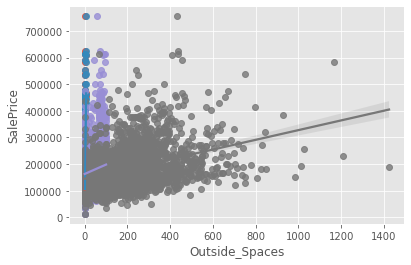

In [21]:
####################################### Engineered Features ##############################################

'''Creating an Alley, Central Air, Electrical, PavedDrive, remodelled, and Pool Booleans'''


tmp['Alley']=tmp['Alley'].replace({'Grvl':1, 'Pave': 1, 'NA': 0})


tmp['CentralAir']=tmp['CentralAir'].replace({'Y': 1, 'N': 0})


tmp['PoolArea']=tmp['PoolArea'].where(tmp['PoolArea'] == 0, 1)
tmp.rename(columns={'PoolArea':'PoolBool'}, inplace=True)

tmp['Electrical']=tmp['Electrical'].replace({'SBrkr':1, 'FuseA': 0, 'FuseF': 0, 'FuseP': 0})


tmp['PavedDrive']=tmp['PavedDrive'].replace({'Y':1, 'N': 0, 'P': 0})


tmp['RemodelBool']= np.where(tmp['YearBuilt']== tmp['YearRemodAdd'], 0, 1)

###########################################################################################################

'''merging condition1 and condition2 into one feature: 2 if by positive feature, 1 if normal, 
0 if negative feature'''


tmp['positive_condition1'] = tmp['Condition1']
tmp['positive_condition2'] = tmp['Condition2']
tmp_condition_columns = tmp[['positive_condition2', 'positive_condition1']]

print(tmp_condition_columns)

dict_ordinal = {
   'Artery':0,
    'RRNe':0,
    'RRAe':0,
    'Feedr':0,
    'RRAn':0,
    'Norm':1,
    'RRNn':0,
    'PosN':2,
    'PosA':2,
        }
#loop to get the job done
for i in tmp_condition_columns.columns:
    tmp.replace({i: dict_ordinal},inplace = True)
tmp['local_conditions'] = tmp['positive_condition1']+tmp['positive_condition2'] #this a combined measure of local features. Railroads and busy streets are just not quite as nice
#to live by as are greenbelts and parks and even normal places
sns.regplot(x=tmp['local_conditions'],y=tmp['SalePrice'])
tmp=tmp.drop(['positive_condition1','positive_condition2'],axis=1)


################################################################################################################

'''concatenating similar types together ie combining warranty deeds under one category, contracts 
under another category, and assigning the rest as other'''


tmp['SaleType']=tmp['SaleType'].replace({'WD':'Warranty_Deed', 'CWD': 'Warranty_Deed', 'VWD': 'Warranty_Deed',
                                      'Con':'Contract', 'ConLw':'Contract', 'ConLI':'Contract',
                                      'ConLD':'Contract', 'New':'Other', 'COD':'Other', 'Oth':'Other' })



################################################################################################################

'''concatenating similar saleconditions together ie Normal in one category and assigning the rest as other'''


tmp['SaleCondition']=tmp['SaleCondition'].replace({'Normal':'Normal', 'Partial': 'Other', 'Abnorml': 'Other',
                                     'Family':'Other', 'Alloca':'Other', 'AdjLand':'Other'})


###############################################################################################################

'''creating new column: Age'''

tmp['Age']=tmp['YrSold']-tmp['YearBuilt']


###############################################################################################################

'''creating new column: total bathrooms'''

tmp['Totalbathr']= tmp['FullBath'] + 0.5*tmp['HalfBath'] + tmp['BsmtFullBath'] + 0.5*tmp['BsmtHalfBath']

sns.regplot(x=tmp['Totalbathr'],y=tmp['SalePrice'])

###############################################################################################################

'''creating new column: Percentage of finished basement'''

tmp['FinBsmt_Perc'] = ((tmp['BsmtFinSF1'] + tmp['BsmtFinSF2'])/(tmp['TotalBsmtSF']+1))*100                                   
                         
sns.regplot(x=tmp['FinBsmt_Perc'],y=tmp['SalePrice'])
    
###############################################################################################################

'''creating new column: Outside Spaces'''

tmp['Outside_Spaces']= tmp['WoodDeckSF']+ tmp['OpenPorchSF'] + tmp['EnclosedPorch'] + tmp['3SsnPorch'] + tmp['ScreenPorch']                         

sns.regplot(x=tmp['Outside_Spaces'],y=tmp['SalePrice'])

###############################################################################################################

'''creating new column: season'''

               
tmp['Season']=tmp['MoSold'].replace({12:'Winter', 1: 'Winter', 2: 'Winter', 3:'Spring',
                                     4:'Spring', 5:'Spring', 6:'Summer',
                                     7:'Summer', 8:'Summer', 9:'Fall', 10:'Fall',
                                     11:'Fall'})



In [22]:
data_House_price=tmp

In [23]:
########################################Add all cleaning before this######################################################

In [24]:
# Decide how to map string values to numerical values for ordinal variables
Ordstr = ['ExterQual','ExterCond', \
            'BsmtQual','HeatingQC','BsmtExposure', 'FireplaceQu', 'KitchenQual', \
              'Fence','LotShape','GarageFinish']

ord2dummies01 = {'Ex':5, 'Gd':4, 'TA':3, 'Fa':2, 'Po':1}
ord_vars01 = ['ExterQual','ExterCond','HeatingQC','KitchenQual']

ord2dummies02 = {'Ex':5, 'Gd':4, 'TA':3, 'Fa':2, 'Po':1, "NA":0}
ord_vars02 = ['BsmtQual', 'FireplaceQu']

ord2dummies03 = {'Gd':3, 'Av':2, 'Mn':1, 'No':0, 'NA':0}
ord_vars03 = ['BsmtExposure']

# ord2dummies04 = {'GLQ':6, 'ALQ':5, 'BLQ':4, 'Rec':3, 'LwQ':2, 'Unf':1, 'NA':0}
# ord_vars04 = ['BsmtFinType1','BsmtFinType2']

# ord2dummies05 = {'Ex':4, 'Gd':3, 'TA':2, 'Fa':1, 'NA':0}
# ord_vars05 = ['PoolQC']

ord2dummies06 = {'GdPrv':4, 'MnPrv':3, 'GdWo':2, 'MnWw':1, 'NA':0}
ord_vars06 = ['Fence']

# ord2dummies07 = {'Stone':4,'BrkCmn':3,'BrkFace':2,'CBlock':1,'None':0}
# ord_vars07 = ['MasVnrType']

ord2dummies08 = {'Reg':3,'IR1':2,'IR2':1,'IR3':0}
ord_vars08 = ['LotShape']

# ord2dummies09 = {'PConc':5,'Slab':4,'CBlock':3,'BrkTil':2,'Stone':1,'Wood':0}
# ord_vars09 = ['Foundation']

ord2dummies10 = {'Fin':3,'RFn':2,'Unf':1,'NA':0}
ord_vars10 = ['GarageFinish']



In [25]:
# Map the values in the dataframe
for i in ord_vars01:
    data_House_price[i].replace(ord2dummies01, inplace=True)

for i in ord_vars02:
    data_House_price[i].replace(ord2dummies02, inplace=True)
    
for i in ord_vars03:
    data_House_price[i].replace(ord2dummies03, inplace=True)

# for i in ord_vars04:
#     data_House_price[i].replace(ord2dummies04, inplace=True) 

# for i in ord_vars05:
#     data_House_price[i].replace(ord2dummies05, inplace=True)

for i in ord_vars06:
    data_House_price[i].replace(ord2dummies06, inplace=True)
    
# for i in ord_vars07:
#     data_House_price[i].replace(ord2dummies07, inplace=True)

for i in ord_vars08:
    data_House_price[i].replace(ord2dummies08, inplace=True)

# for i in ord_vars09:
#     data_House_price[i].replace(ord2dummies09, inplace=True)
    
for i in ord_vars10:
    data_House_price[i].replace(ord2dummies10, inplace=True)
    
# Assign a binary value for whether or not a house has a pool
#data_House_price.loc[data_House_price['PoolArea'] > 0] = 1

In [26]:
'''Dummifying Nominal Categories to be used'''

Nomstr = ['MSZoning','Alley','LandContour', \
               'LotConfig','Neighborhood', \
               'HouseStyle','RoofStyle', 'Foundation', 'MasVnrType', \
               'CentralAir','Electrical', \
               'PavedDrive','SaleType','SaleCondition', 'PoolBool', 'Season', 'RemodelBool']
for i in Nomstr:   
    dummy = pd.get_dummies(data_House_price[i], prefix=i, prefix_sep='__')
    dummy = dummy.drop(i+'__'+str(data_House_price[i].mode()[0]), axis=1)
    data_House_price = pd.concat([data_House_price.drop(i, axis=1), dummy], axis=1)

In [27]:
missingCols = np.sum(data_House_price.isnull())

print(missingCols[missingCols>0])

Series([], dtype: int64)


In [28]:
''' Layal - Trial1: multiple linear Regression model with outliers '''

# - Quantitative

# quan = housing[['GrLivArea',,'LotArea', 
#                 'LowQualFinSF', 'YrSold', 'LotFrontage','MasVnrArea', 'TotalBsmtSF', 'GarageArea' ]]


# - Engineered Features: 1. Outside Space: summ['WoodDeckSF', 'OpenPorchSF','EnclosedPorch', '3SsnPorch', 'ScreenPorch']),
#                        2. Age: ['YrSold'] - ['YearBuilt']
#                        3. perc of fin Bsmt: ['BsmtFinSF1'] + ['BsmtFinSF2'] /['TotalBsmtSF']
#                        4. All BathR: summ['BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath']
#                        5. local_condition: ['Condition1'] + ['Condition2']
#                        6. Boolean Pool:  1 VS 0
#                        7. Boolean Electrical: 1 VS 0
#                        8. ['SaleType'] : WD vs Con vs oth
#                        9. Boolean Remodeled: 1 VS 0


# - Categorical

# Obj_Ordinal_Categorical = housing[[ 'OverallQual','OverallCond', 'TotRmsAbvGrd','ExterQual','BsmtQual', 'BsmtExposure', 
#                    'HeatingQC', 'KitchenQual' , 'FireplaceQu' , 'Fence' ]]  

# Obj_Nominal_Categorical = housing[['MSZoning', 'Alley', 'LotShape', 'LandContour',
#        'LotConfig', 'Neighborhood', 'HouseStyle', 'RoofStyle', 
#        'MasVnrType', 'Foundation', 'CentralAir', 
#        'PavedDrive', 'SaleType']]



' Layal - Trial1: multiple linear Regression model with outliers '

In [29]:
''' Layal - Trial2: multiple linear Regression model without outliers '''
# - Quantitative

# quan = housing[['GrLivArea',,'LotArea', 
#                 'LowQualFinSF', 'YrSold', 'LotFrontage','MasVnrArea', 'TotalBsmtSF', 'GarageArea' ]]


# - Engineered Features: 1. Outside Space: summ['WoodDeckSF', 'OpenPorchSF','EnclosedPorch', '3SsnPorch', 'ScreenPorch']),
#                        2. Age: ['YrSold'] - ['YearBuilt']
#                        3. perc of fin Bsmt: ['BsmtFinSF1'] + ['BsmtFinSF2'] /['TotalBsmtSF']
#                        4. All BathR: summ['BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath']
#                        5. local_condition: ['Condition1'] + ['Condition2']
#                        6. Boolean Pool:  1 VS 0
#                        7. Boolean Electrical: 1 VS 0
#                        8. ['SaleType'] : WD vs Con vs oth
#                        9. Boolean Remodeled: 1 VS 0


# - Categorical

# Obj_Ordinal_Categorical = housing[[ 'OverallQual','OverallCond', 'TotRmsAbvGrd','ExterQual','BsmtQual', 'BsmtExposure', 
#                    'HeatingQC', 'KitchenQual' , 'FireplaceQu' , 'Fence' ]]  

# Obj_Nominal_Categorical = housing[['MSZoning', 'Alley', 'LotShape', 'LandContour',
#        'LotConfig', 'Neighborhood', 'HouseStyle', 'RoofStyle', 
#        'MasVnrType', 'Foundation', 'CentralAir', 
#        'PavedDrive', 'SaleType']]

'''identifying outliers using plotly boxplots: graphs notebook'''


'''LotFrontage > 300'''
data_House_price.loc[[982]]


'''LotArea > 10,0000'''

data_House_price.loc[[356,1635,250,1272]]


'''BsmtFinSF2 > 1350 '''

data_House_price.loc[[309,1244,2089]]


'''GarageArea > 450 '''

data_House_price.loc[[1488]][['GarageArea']]



data_House_price.loc[[982,356,1635,250,1272,309,1244,2089,1488]]

# '''Droping Outliers'''
# data_House_price = data_House_price.drop([8,982,356,1635,250,1272,309,1244,2089,1488],0)  


,PID,GrLivArea,SalePrice,MSSubClass,LotFrontage,LotArea,LotShape,LandSlope,Condition1,Condition2,...,Electrical__0,PavedDrive__0,SaleType__Contract,SaleType__Other,SaleCondition__Other,PoolBool__1,Season__Fall,Season__Spring,Season__Winter,RemodelBool__1
982,535427070,2069,242000,20,313.000000,27650,1,Mod,PosA,Norm,...,0,0,0,0,0,0,1,0,0,1
356,916176125,2036,375000,20,150.000000,215245,0,Sev,Norm,Norm,...,0,0,0,0,0,0,0,0,0,0
1635,916125425,1786,228950,190,81.468023,164660,2,Sev,Norm,Norm,...,0,0,0,0,0,0,0,0,0,0
250,906426060,2144,277000,50,56.456790,159000,1,Sev,Norm,Norm,...,0,0,0,0,0,0,0,0,0,1
1272,905301050,1824,302000,20,56.456790,115149,1,Sev,Norm,Norm,...,0,0,0,0,0,0,0,0,0,1
309,528363050,2063,315000,20,56.456790,10750,2,Gtl,Norm,Norm,...,0,0,0,0,0,0,0,0,0,1
1244,906201200,2730,301000,60,86.000000,10380,2,Gtl,Norm,Norm,...,0,0,0,0,0,0,0,0,0,1
2089,528360050,3500,584500,60,114.000000,17242,2,Gtl,Norm,Norm,...,0,0,0,0,0,0,0,1,0,1
1488,527357110,1308,146900,60,75.000000,9743,3,Gtl,Norm,Norm,...,0,0,0,0,0,0,0,0,0,0


In [30]:
x.columns

NameError: name 'x' is not defined

In [ ]:
x = data_House_price.drop(['PID','SalePrice','MSSubClass','LandSlope','Condition1','Condition2','YearBuilt','YearRemodAdd','RoofMatl',\
                            'Exterior1st', 'Exterior2nd', 'BsmtCond', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', \
                           'BsmtFinSF2',  'BsmtUnfSF','Heating', 'BsmtFullBath', '1stFlrSF', '2ndFlrSF', \
                           'BsmtHalfBath','FullBath','HalfBath','Fireplaces',\
                          'BedroomAbvGr',  'KitchenAbvGr','Functional','GarageType', 'GarageYrBlt',\
                           'GarageCars', 'GarageQual', 'WoodDeckSF','OpenPorchSF','EnclosedPorch',\
                           '3SsnPorch','ScreenPorch','GarageCond','PoolQC','MoSold','YearSinceBuiltRemodeled'],axis=1)




# # These are the parameters for which a logistic regression shall me performed
# x_log = ['GrLivArea','LotArea','TotalBsmtSF','LotFrontage']
# x_log_index = x.index.to_list()

#  # Bump up values for zero in order to compute logistic regression
# for j in x_log:
#     for i in x_log_index:
#         if x[j][i] == 0:
#             x[j][i] += 0.001
#         else:
#             pass


#Convert the independent variables parameters selected above to a logistic regression range
# for j in x_log:
#     x[j] = np.log(x[j])
    

###################  
    
y = data_House_price['SalePrice']

y = np.log(y)


#to convert whatever strings your data might contain to numeric values. 
#If they're incompatible with conversion, they'll be reduced to NaNs.
x = x.apply(pd.to_numeric, errors='coerce')
y = y.apply(pd.to_numeric, errors='coerce')
x.fillna(0, inplace=True)
y.fillna(0, inplace=True)


#importing train_test_split from sklearn
from sklearn.model_selection import train_test_split
# splitting the data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

# importing module
from sklearn.linear_model import LinearRegression
# creating an object of LinearRegression class
LR = LinearRegression()
# fitting the training data
LR.fit(x_train,y_train)

print("R^2: %f" %(LR.score(x_train,y_train)))
print("R^2: %f" %(LR.score(x_test,y_test)))
print("Intercept: %f" %LR.intercept_)
print("Coefficients: %s" %str(LR.coef_))




features20 = sm.add_constant(x_train)
ols_sm20   = OLS(y_train,features20)
lm_test20    = ols_sm20.fit()

print(lm_test20.summary())

y_preds = LR.predict(x_train)

go.Figure(data=[go.Scatter(x=y_train, y= y_preds, text=data_House_price['SalePrice'].index, mode='markers',\
marker_color=('#80d7cc'))]).update_layout( plot_bgcolor='white', title_text= 'Actual VS Predicted', \
title_x=0.5, xaxis_title='Measured', yaxis_title='Predicted', legend=dict(x=1.0, y=0.5)).update_yaxes(showgrid=True,\
gridwidth=0.3, gridcolor='#ededed').update_xaxes(showgrid=True, gridwidth=0.3, gridcolor='#ededed').show()

In [ ]:
#data_House_price.loc[[2010,1166]]

In [ ]:
from sklearn import preprocessing

sc = preprocessing.StandardScaler()
Z_train = sc.fit_transform(x_train)
Z_test = sc.transform(x_test)
lr_stan = LinearRegression()
lr_stan.fit(x_train, y_train)
print(f' Scaled Linear Regression training R^2 score: {round(lr_stan.score(Z_train, y_train),4)}')
print(f' Scaled Linear Regression test R^2 score: {round(lr_stan.score(Z_test, y_test),4)}')



# import matplotlib.pyplot as plt

y_preds = lr_stan.predict(Z_train)
# # fig, ax = plt.subplots()
# # ax.scatter(y_train, y_preds)
# # ax.plot([y.min(), y.max()],[y.min(),y.max()],'k--')
# # ax.set_xlabel('Measured')
# # ax.set_ylabel('Predicted')
# # plt.axhline(y_train.mean(),c='red')
# # # plt.title("Mean in red, Scaled Ordinary Least Squares in black")
# # # plt.show()

go.Figure(data=[go.Scatter(x=y_train, y= y_preds, text=data_House_price['SalePrice'].index, mode='markers',\
marker_color=('#80d7cc'))]).update_layout( plot_bgcolor='white', title_text= 'Actual VS Predicted', \
title_x=0.5, xaxis_title='Measured', yaxis_title='Predicted', legend=dict(x=1.0, y=0.5)).update_yaxes(showgrid=True,\
gridwidth=0.3, gridcolor='#ededed').update_xaxes(showgrid=True, gridwidth=0.3, gridcolor='#ededed').show()

In [ ]:
from sklearn.linear_model import HuberRegressor

huber = HuberRegressor().fit(x_train, y_train)
huber.score(x_test, y_test)

In [ ]:
ridge = Ridge()
ridge.fit(x_train, y_train)
print('the ridge intercept is: %.2f' %(ridge.intercept_))
#pd.Series(ridge.coef_, index=house_features.columns)
ridge.score(x_test, y_test)

In [ ]:
lasso  = Lasso()
alphas = np.linspace(0.001,1.1,20)
lasso.set_params(normalize=False)
coefs_lasso  = []
score_lasso  = []

for alpha in alphas:
        lasso.set_params(alpha=alpha)
        lasso.fit(x_train, y_train)  
        coefs_lasso.append(lasso.coef_)
        score_lasso.append(lasso.score(x_test, y_test))

coefs_lasso = pd.DataFrame(coefs_lasso, index = alphas, columns = x.columns)  
#print(coefs_lasso.head())
score_lasso

In [ ]:
elasticnet = ElasticNet(alpha=0.00001, l1_ratio=0.5, normalize=True)
elasticnet.fit(x, y)
print(r'The R^2 is %.2f' %(elasticnet.score(x, y)))
elasticnet.coef_,  elasticnet.intercept_

In [ ]:
from sklearn.ensemble import RandomForestRegressor
# Instantiate model with 1000 decision trees
rf = RandomForestRegressor(n_estimators = 1000, random_state = 0)
# Train the model on training data
rf.fit(x_train, y_train)
rf.score(x_test,y_test)

In [ ]:
#Import svm model
from sklearn import svm
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# #Create a svm Classifier
# clf = svm.SVC(kernel='linear') # Linear Kernel

# #Train the model using the training sets
# clf.fit(x_train, y_train)

# #Predict the response for test dataset
# y_pred = clf.predict(x_test)

# # Model Accuracy: how often is the classifier correct?
# print("Accuracy:",metrics.accuracy_score(y_test, y_pred))